# pyromsobs tutorial 

This notebook provides some simple examples demonstrating the key features of <font color=blue>**pyromsobs**</font>. 

<font color=blue>**pyromsobs**</font> treats observations as an object. The structure of an observation object is similar to the structure of the ROMS observation netCDF format, using the same variable names (minus the "obs" part - so e.g. obs_value is simply value.) The object class is called OBSstruct, and can be initialized in several ways: 
 - creating an empty instance: `obs = pyromsobs.OBSstruct()`; 
 - opening an existing observation file: `obs = pyromsobs.OBSstruct('obsfile.nc')`; 
 - creating a copy of an existing observation object: `new_obs = pyromsobs.OBSstruct(obs)`. 
 
The latter ensures that `new_obs` is a independent object, not a pointer to `obs`. 

An observation object can easily be subsetted based on indexing: `new_obs = obs[0:10]` would return the 10 first observation on the object, and similarly `new_obs = obs[ np.where( obs.type == 7) ]` would return all the salinity observations present at the object. 

This structure makes <font color=blue>**pyromsobs**</font> a practical tool for not only creating new observation files, but working with existing observation files, as well by providing a simple interface to the contents of the file. <font color=blue>**pyromsobs**</font> also supports the extra information provided (only variables with the datum dimension) in the ROMS output modfiles, and can thus be a practical tool also for postprocessing tasks. 

In addition to the standard variables on a ROMS observation file, pyromsobs has some additional variables for extra book-keeping: 
- true_depth
- true_time
- instrumental_error

We will start by creating some observations which we will keep working on through this tutorial. 



In [1]:
import pyromsobs
import numpy as np
from datetime import datetime, timedelta

reftime = datetime(1970,1,1)

In [2]:
# We'd like to reinitialize our observations later on in this tutorial, so to avoid duplicating code we'll create our observations inside a function


def create_obs():
    today = datetime.now()
    
    obs1 = pyromsobs.OBSstruct()
    obs1.value = np.array([5.])
    obs1.type = np.array([6])
    obs1.error = np.array([0.5])
    obs1.lat = np.array([65.5])
    obs1.lon = np.array([4])
    obs1.depth = np.array([-10])
    obs1.time =  np.array([(today - reftime).total_seconds()/86400.]) # Today in fractional days since reftime  
    obs1 = pyromsobs.utils.setDimensions(obs1) # This function will set Nsurvey, survey_time, and Nobs.
    
    obs2 = pyromsobs.OBSstruct()
    obs2.value = np.array([5.6])
    obs2.type = np.array([6])
    obs2.lat = np.array([65.5])
    obs2.lon = np.array([4])
    obs2.depth = np.array([-10])
    obs2.error = np.array([0.5])
    obs2.time =  np.array([(today - reftime).total_seconds()/86400.]) # Today in fractional days since reftime  
    obs2 = pyromsobs.utils.setDimensions(obs2)
    
    
    obs3 = pyromsobs.OBSstruct()
    obs3.value = np.array([35.5, 35.4])
    obs3.type = np.array([7, 7])
    obs3.error = np.array([0.05, 0.05])
    obs3.lat = np.array([65.5, 65.5])
    obs3.lon = np.array([4.01, 4])
    obs3.depth = np.array([-10, -10])
    obs3.time =  np.ones(2)*obs2.time[0]
    obs3 = pyromsobs.utils.setDimensions(obs3)
    
    return obs1, obs2, obs3

def print_content(obs):
    print('\n')
    # Let's check out the content: 
    print('Number of observations: {}'.format(obs.Ndatum)  )
    print('Number of surveys: {}'.format(obs.Nsurvey)  )
    print('Surveys times {}'.format(obs.survey_time)  )

    print('\n')
    
    
    field_list = obs.getfieldlist() # This will return a list of the variable names on the object with data
    for variable in field_list:
         print('{} {}'.format(variable, getattr(obs, variable)) )

# Creating an observation file
 
 Creating an observation file from an observation object is implemented as method, and the syntax is as simple as
 `obs.writeOBS('observation_file_name.nc')`
 
 There are however several optional input arguments to the method: 
 - <font color=green>reftime</font> -  defaults to '1970-01-01 00:00:00' (in string format)
 - <font color=green>timeunits </font> -  defaults to 'days' (in string format)
 
 Note that the user must make sure the information provided in reftime, timeunits is compatible with the way the values in obs.time are set. 
 
 
 -  <font color=green>attributes </font> - Global attributes can be defined either in a file (se METattributes.att in the repository for an example), or in a dictionary ( attdict = {'attributename': attributevalue})
 
 
 -  <font color=green>mode </font> - 'default' will write all standard observation variables (+ the three extra variables) that are defined and have the same dimension as Ndatum. If mode is set to 'modfile' any defined modfile variables (such as NLmodel_value, misfit_final) will be written as well.


 -  <font color=green>exclude_list </font>  To avoid writing of selected variables (e.g. to limit file size), one can either make sure that the variable is empty `obs.lon = np.array([])`, or provide a list of variables that should not be written to file. E.g. ['lon', 'lat', 'true_time', 'true_depth', 'instrumental_error'] 
 



In [3]:
# First we initialize 3 observation objects using the function defined above
obs1, obs2, obs3 = create_obs()

# Let's check out their contents: 
for obs in [obs1, obs2, obs3]:
    print_content(obs)

# We can store the content of an observation object

attdict = {'flag_values': [1, 2], 'flag_meanings': "temperature salinity", 'title': 'ROMS observation file'}
obs3.Ndatum
obs3.writeOBS('test_observations.nc', attributes = attdict)




Number of observations: 1
Number of surveys: 1
Surveys times [18681.6926552]


time [18681.6926552]
type [6]
depth [-10]
error [0.5]
value [5.]
lon [4]
lat [65.5]


Number of observations: 1
Number of surveys: 1
Surveys times [18681.6926552]


time [18681.6926552]
type [6]
depth [-10]
error [0.5]
value [5.6]
lon [4]
lat [65.5]


Number of observations: 2
Number of surveys: 1
Surveys times [18681.6926552]


time [18681.6926552 18681.6926552]
type [7 7]
depth [-10 -10]
error [0.05 0.05]
value [35.5 35.4]
lon [4.01 4.  ]
lat [65.5 65.5]
No information on grid type (spherical = 0 ,spherical= 1)
Consider adding this information!
No provenance attributes available
Skipping provenance
Skipping Xgrid
Skipping Ygrid
Skipping Zgrid
Skipping meta


# Merging observations 
<font color=blue>**pyromsobs**</font>.<font color=red>**merge**</font>() is a function which can be used to merge observation objects. It takes a list of at least two observation objects, observation files, or a mixture as input and returns a new observation object, which contains all observations present in the inputs. The returned object will have correct values for Nsurvey, survey_time, and Nobs - and the observations will be sorted according to ascending time. 
Usage: 

 - `obs = pyromsobs.merge([obs1, obs2, obs3])`

 - `obs = pyromsobs.merge(['observation_file1.nc',  'observation_file2.nc'])`
 
 - `obs = pyromsobs.merge([obs1, 'observation_file1.nc'])`

In [4]:
# To combine these observations in one object, we can use the merge function: 
obs = pyromsobs.merge([obs1, obs2, obs3])

# Let's check out the content: 
print_content(obs)

# The observations we just merged all contained the same variables. merge() does however also handle merging of objects were the objects may contain different variables. 
# Any observation for which a variable is not defined will then have NaN for that variable. 
# We can assign a provenance value to obs1, and meta values to the observations in obs3 to demonstrate this: 
obs1.provenance = np.ones_like(obs1.value) 
obs3.meta = np.zeros_like(obs3.value) 

# At the same time, let's change the time of obs2 (temperature, 5.6 degrees), to verify the sorting: 
obs2.time -= 2 # subtract 2 


obs = pyromsobs.merge([obs1, obs2, obs3])
print_content(obs)

   



Number of observations: 4
Number of surveys: 1
Surveys times [18681.6926552]


time [18681.6926552 18681.6926552 18681.6926552 18681.6926552]
type [6 6 7 7]
depth [-10 -10 -10 -10]
error [0.5  0.5  0.05 0.05]
value [ 5.   5.6 35.4 35.5]
lon [4.   4.   4.   4.01]
lat [65.5 65.5 65.5 65.5]


Number of observations: 4
Number of surveys: 2
Surveys times [18679.6926552 18681.6926552]


time [18679.6926552 18681.6926552 18681.6926552 18681.6926552]
type [6 6 7 7]
provenance [nan  1. nan nan]
depth [-10 -10 -10 -10]
error [0.5  0.5  0.05 0.05]
value [ 5.6  5.  35.5 35.4]
lon [4.   4.   4.01 4.  ]
lat [65.5 65.5 65.5 65.5]
meta [nan nan  0.  0.]


# Calculating fractional grid coordinates

<font color=blue>**pyromsobs**</font>.<font color=red>**calcFracGrid**</font>() handles the calculation of fractional grid coordinates. It takes an observation object (or file) and a roms output file (e.g. history) as inputs. Additional arguments are onlyHorizontal, onlyVertical, and method. Setting onlyHorizontal or onlyVertical to True will ensure that only the horizontal or vertical coordinates are calculated. 

Example of usage: 

 - `obs = pyromsobs.calcFracGrid(obs, hisfile)`

 - `obs = pyromsobs.calcFracGrid(obs, hisfile, onlyHorizontal = True, method = 'griddata')`
 
Default method is 'obs_ijpos', which will try to use information on the grid projection to do the calculations . If unable to find information on projection, it will use scipy.interpolate.griddata to do the calculations. The method 'griddata' uses scipy.interpolate.griddata to perform linear interpolation to find the fractional grid coordinates. The latter method is faster for large number of observations (+20 000).  

<font color=red>Note that any observations that fall outside the model domain or on land will be discarded in this step.</font> 

In [5]:
romsfile = 'https://thredds.met.no/thredds/dodsC/sea_norshelf_avg_agg'

# let's try it out: 
obs = pyromsobs.calcFracGrid(obs, romsfile, onlyHorizontal = True)
# after this step the object will have two new variables on it, Xgrid and Ygrid:
print_content(obs)

# We can move the first observation location to be outside the model domain by changing the latitude
obs.lat[0] = 0
# Redoing the calculation, as well as performing the calculations for Zgrid now yields
obs = pyromsobs.calcFracGrid(obs, romsfile)
print_content(obs)





Number of observations: 4
Number of surveys: 2
Surveys times [18679.6926552 18681.6926552]


time [18679.6926552 18681.6926552 18681.6926552 18681.6926552]
type [6 6 7 7]
provenance [nan  1. nan nan]
Xgrid [397.58301016 397.58301016 397.6592942  397.58301016]
Ygrid [294.2155821  294.2155821  294.04456918 294.2155821 ]
depth [-10 -10 -10 -10]
error [0.5  0.5  0.05 0.05]
value [ 5.6  5.  35.5 35.4]
lon [4.   4.   4.01 4.  ]
lat [65.5 65.5 65.5 65.5]
meta [nan nan  0.  0.]


Number of observations: 3
Number of surveys: 1
Surveys times [18681.6926552]


time [18681.6926552 18681.6926552 18681.6926552]
type [6 7 7]
provenance [ 1. nan nan]
Xgrid [397.58301016 397.6592942  397.58301016]
Ygrid [294.2155821  294.04456918 294.2155821 ]
depth [-10 -10 -10]
Zgrid [38 38 38]
error [0.5  0.05 0.05]
value [ 5.  35.5 35.4]
lon [4.   4.01 4.  ]
lat [65.5 65.5 65.5]
meta [nan  0.  0.]


# Superobbing

<font color=blue>**pyromsobs**</font>.<font color=red>**superob**</font>() 
Similar to merge and calcFracGrid, the input can be either an observation object or an observation file.

Example of usage: 

 - `obs = pyromsobs.superob(obs)`
 - `obs = pyromsobs.superob(obs , superprov = 0) 
 
During superobing observations that are combined with observations with the same provenance will keep the provenance value. When superobbing across provenances, the provenance of the resulting superobservation will be `superprov + obs.type`. The default value of `superprov` is set to 0, thus a superobservation of temperature will get a provenance of 6. The provenance can easily be changed after superobbing: 


 


In [6]:
obs1, obs2, obs3 = create_obs()
obs = pyromsobs.merge([obs1, obs2, obs3])
obs = pyromsobs.calcFracGrid(obs, romsfile)
# Create some provenance values:
obs.provenance = np.zeros_like(obs.type)
obs.provenance[np.where(obs.type == 6)] = np.arange(10, 10 +obs[np.where(obs.type == 6)].Ndatum)
obs.provenance[np.where(obs.type == 7)] = np.arange(20, 20 +obs[np.where(obs.type == 7)].Ndatum)

print('Before superobbing:')
print_content(obs)

# Out temperature observations are in the exact same location, but with different observation values. 
# The salinity observations are inside the same grid cell, but slightly apart. 

obs = pyromsobs.superob(obs)
print('\n')
print('After superobbing:')
print_content(obs)

# After this step the provenances will be changed, to 6 for the temperature and 7 for salinity. 
# We can easily change these to custom values: 
superprovs = {1 : 100, 2 : 200, 3 : 300, 4 : 400, 5 : 500, 6 : 600, 7 : 700} # Key indicates obstype, values are provenances

for obstype in superprovs.keys():
    obs.provenance[np.where(obs.type == obstype)] = superprovs[obstype]
    
print_content(obs)
    


Before superobbing:


Number of observations: 4
Number of surveys: 1
Surveys times [18681.6928284]


time [18681.6928284 18681.6928284 18681.6928284 18681.6928284]
type [6 6 7 7]
provenance [10 11 20 21]
Xgrid [397.58301016 397.58301016 397.58301016 397.6592942 ]
Ygrid [294.2155821  294.2155821  294.2155821  294.04456918]
depth [-10 -10 -10 -10]
Zgrid [38 38 38 38]
error [0.5  0.5  0.05 0.05]
value [ 5.   5.6 35.4 35.5]
lon [4.   4.   4.   4.01]
lat [65.5 65.5 65.5 65.5]


After superobbing:


Number of observations: 2
Number of surveys: 1
Surveys times [18681.6928284]


time [18681.6928284 18681.6928284]
type [6. 7.]
provenance [6. 7.]
Xgrid [397.58301016 397.62115218]
Ygrid [294.2155821  294.13007564]
depth [-10. -10.]
Zgrid [38. 38.]
error [0.5  0.05]
value [ 5.3  35.45]
lon [4.    4.005]
lat [65.5 65.5]


Number of observations: 2
Number of surveys: 1
Surveys times [18681.6928284]


time [18681.6928284 18681.6928284]
type [6. 7.]
provenance [600. 700.]
Xgrid [397.58301016 397.62115

# Removing duplicated observation and adjusting the surveys

<font color=blue>**pyromsobs**</font>.<font color=red>**remove_duplicates**</font>() will identify duplicated observations based on similar values for the variables `time`, `Xgrid`, `Ygrid`, `Zgrid`, and `value` (rounded to down to 3 decimals (4 for value)). Usage:

`obs = pyromsobs.remove_duplicates(obs)`


<font color=blue>**pyromsobs**</font>.<font color=red>**adjust_survey**</font>()
This function can be used to evenly space the survey_times. Observations will be assigned to the survey_time closest in time. 
Usage:

`obs = pyromsobs.adjust_survey(obs, dt)`


Where `dt` is the interval between survey_times in hours. 


<font color=red>Note that the original observation times will be overwritten in this function.</font> 
If you'd like to keep a copy of the actual observation times, you can use the variable true_time for this. 

In [7]:
obs1, obs2, obs3 = create_obs()

# Let's use obs1 to create a timeseries with temperature observations every five minutes:
now = datetime.now() 
now = datetime(now.year, now.month, now.day, now.hour) 
newtime = datetime(now.year, now.month, now.day, now.hour) 

# reset the time of obs1 to now
obs1.time[:] = (now - reftime).total_seconds()/86400. 
# We will also need Xgrid, Ygrid, Zgrid to be set. 
obs1 = pyromsobs.calcFracGrid(obs1, romsfile)
# Create a copy of obs1:
obs = pyromsobs.OBSstruct(obs1)

while newtime <= now + timedelta(hours = 1): 
    newtime += timedelta(minutes = 5) # update now    
    
    # change the time
    obs.time[:] = (newtime - reftime).total_seconds()/86400. 
    
    # Add the observation to obs1:
    obs1.append(obs)
    
    # Also add a duplicate every 15 minutes:
    #if not np.mod(newtime.minute, 15):  # returns zero if it can be devided by 15
    #    obs1.append(obs)

print('OUR OBSERVATIONS:')
print('Number of observations: {}'.format(obs1.Ndatum)  )
print('Number of surveys: {}'.format(obs1.Nsurvey)  )

print('{}'.format([(reftime + timedelta(days = t)).strftime('%Y-%m-%d %H:%M') for t in obs1.time]))
    

# Remove the duplicates: 
obs1 = pyromsobs.remove_duplicates(obs1)
print('\n')
print('AFTER REMOVAL OF DUPLICATES:')
print('Number of observations: {}'.format(obs1.Ndatum)  )
print('Number of surveys: {}'.format(obs1.Nsurvey)  )

print('{}'.format([(reftime + timedelta(days = t)).strftime('%Y-%m-%d %H:%M') for t in obs1.time]))


# Adjust the surveys: 
obs1 = pyromsobs.adjust_survey(obs1, dt = 1/4) # dt is in hours, so this will yield observations every 15 minutes.

print('\n')
print('AFTER ADJUSTING SURVEYS:')
print('Number of observations: {}'.format(obs1.Ndatum)  )
print('Number of surveys: {}'.format(obs1.Nsurvey)  )

print('{}'.format([(reftime + timedelta(days = t)).strftime('%Y-%m-%d %H:%M') for t in obs1.time]))



OUR OBSERVATIONS:
Number of observations: 14
Number of surveys: 14
['2021-02-23 16:00', '2021-02-23 16:05', '2021-02-23 16:10', '2021-02-23 16:15', '2021-02-23 16:20', '2021-02-23 16:25', '2021-02-23 16:30', '2021-02-23 16:35', '2021-02-23 16:40', '2021-02-23 16:45', '2021-02-23 16:50', '2021-02-23 16:55', '2021-02-23 17:00', '2021-02-23 17:05']


AFTER REMOVAL OF DUPLICATES:
Number of observations: 14
Number of surveys: 14
['2021-02-23 16:00', '2021-02-23 16:05', '2021-02-23 16:10', '2021-02-23 16:15', '2021-02-23 16:20', '2021-02-23 16:25', '2021-02-23 16:30', '2021-02-23 16:35', '2021-02-23 16:40', '2021-02-23 16:45', '2021-02-23 16:50', '2021-02-23 16:55', '2021-02-23 17:00', '2021-02-23 17:05']


AFTER ADJUSTING SURVEYS:
Number of observations: 14
Number of surveys: 5
['2021-02-23 16:00', '2021-02-23 16:00', '2021-02-23 16:15', '2021-02-23 16:15', '2021-02-23 16:15', '2021-02-23 16:30', '2021-02-23 16:30', '2021-02-23 16:30', '2021-02-23 16:44', '2021-02-23 16:44', '2021-02-23 16:

# Visualization 
<font color=blue>**pyromsobs**</font> comes with some simple visualization methods. 
`pyromsobs.plot_obs(obs, romsfile, obstype )` will plot the observations of the given type on simple map of the model domain (using X, Y dimension and mask_rho). One can choose to plot observations within a given depth or time interval, and control the minmum and maximum of the colorbar, as well as routing the plot to a file instead of displaying it by providing extra input to the function. 

- `depthmin` - the most shallow depth to include
- `depthmax` - the deepest depth to include  (depthmin and depthmax can be either positive or negative)
- `timemin`, `timemax`  - similar as above, but for time. Needs to be in the same format as obs.time 
- `Vmin`,`Vmax`  - colorbar control 
- `fileout` - path/filename to store the figure


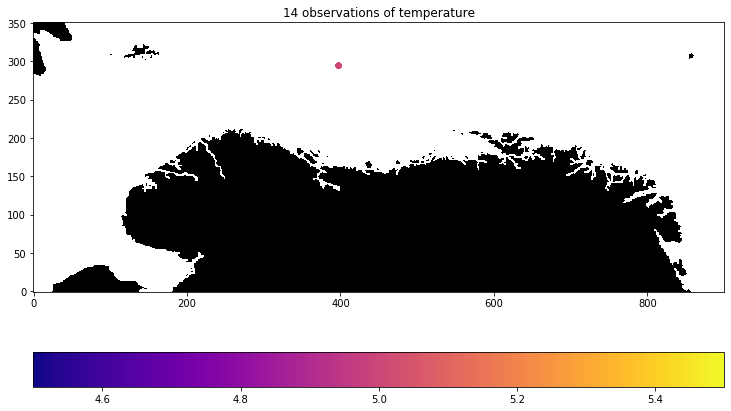

In [8]:
pyromsobs.plot_obs(obs1, romsfile, obstype = 6)

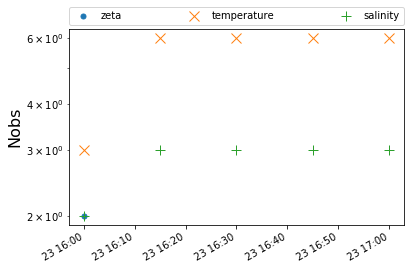

In [9]:
# plot_datum plots the number of observations per observation time as a function of time,
# Add some more observations to our object first: 

obs = pyromsobs.OBSstruct(obs1) 
obs.type[:] = 7

obs1.append(obs1)  # increase number of temperature observations

obs2 = obs1[0]
obs2.type[:] = 1

obs = pyromsobs.merge([obs, obs2, obs1])

pyromsobs.plot_datum(obs, reftime)

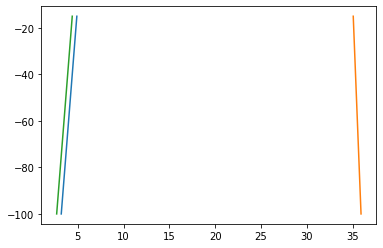

In [10]:
# T/S profiles can be extracted by invoking get_profiles(S, obstype = None, provtype = None, ndepths = 2) 
# It has the ability to filter the data based on observation type and provenance, but by default it will return
# all observation that form a profile (based on having the same type, provenance, lat, lon, time values). 
# The argument ndepths indicate how many unique depths we require for extracting a profile. 

# To demonstrate how this can be done, we'll first create two observation objects with profiles of T/S
import matplotlib.pyplot as plt 

obs1, obs2, obs3 = create_obs()

obs2.type[:] = 7; obs2.value[:] = 35; obs2.provenance = np.ones_like(obs2.value) *700
obs1.provenance = np.ones_like(obs1.value)*600

depth = obs1.depth[0]

while depth > -100: 
    depth -= 5. 
    tmp = obs1[-1]
    tmp.depth[:] = depth
    tmp.value[:] -= 0.1
    obs1.append(tmp)
    
    tmp = obs2[-1]
    tmp.depth[:] = depth
    tmp.value[:] += 0.05
    obs2.append(tmp)
    

obs3 = pyromsobs.OBSstruct(obs1)
obs3.lat[:] = 67
obs3.value[:] -= 0.5 
obs = pyromsobs.merge([obs1, obs2, obs3] )

OBS, Nprof, profileID = pyromsobs.get_profiles(obs, ndepths=3)
for n in range(Nprof):
     plt.plot(OBS[np.where(profileID == n)].value, OBS[np.where(profileID == n)].depth)

